In [1]:
# 14-9. 프로젝트 - Movielens 영화 추천 실습

27 line 부터 colab과 연결되어 진행.

아래 코드들은 그냥 복붙한 상태

In [2]:
import pandas as pd
import os
rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
ratings.tail()

,user_id,movie_id,ratings,timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [4]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')


orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [5]:
# ratings 컬럼의 이름을 counts로 바꿉니다.
ratings.rename(columns={'ratings':'counts'}, inplace=True)

In [6]:
ratings['counts']

0          5
1          3
2          3
3          4
4          5
          ..
1000203    3
1000205    5
1000206    5
1000207    4
1000208    4
Name: counts, Length: 836478, dtype: int64

In [7]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
union_data = pd.merge(movies, ratings)

In [9]:
union_data['title'] = union_data['title'].str.lower() # 검색을 쉽게 하기 위해 영화 제목을 소문자로 바꿔주기
union_data.head(20)

,movie_id,title,genre,user_id,counts,timestamp
0,1,toy story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,toy story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,toy story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,toy story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,toy story (1995),Animation|Children's|Comedy,10,5,978226474
5,1,toy story (1995),Animation|Children's|Comedy,18,4,978154768
6,1,toy story (1995),Animation|Children's|Comedy,19,5,978555994
7,1,toy story (1995),Animation|Children's|Comedy,21,3,978139347
8,1,toy story (1995),Animation|Children's|Comedy,23,4,978463614
9,1,toy story (1995),Animation|Children's|Comedy,26,3,978130703


In [10]:
# ratings에 있는 유니크한 영화 개수
ratings['movie_id'].nunique()

3628

In [11]:
# ratings에 있는 유니크한 사용자 수
ratings['user_id'].nunique()

6039

In [12]:
# 가장 인기 있는 영화 30개 (인기순) ---> 이 부분을 진행하기 위해 column을 병합하였다.

movies_count = union_data.groupby('title')['user_id'].count()
movies_count.sort_values(ascending=False).head(30)


title
american beauty (1999)                                   3211
star wars: episode iv - a new hope (1977)                2910
star wars: episode v - the empire strikes back (1980)    2885
star wars: episode vi - return of the jedi (1983)        2716
saving private ryan (1998)                               2561
terminator 2: judgment day (1991)                        2509
silence of the lambs, the (1991)                         2498
raiders of the lost ark (1981)                           2473
back to the future (1985)                                2460
matrix, the (1999)                                       2434
jurassic park (1993)                                     2413
sixth sense, the (1999)                                  2385
fargo (1996)                                             2371
braveheart (1995)                                        2314
men in black (1997)                                      2297
schindler's list (1993)                                  2257
pr

In [13]:
# 좋아하는 영화 5가지 선정.. 단, 이름은 꼭 데이터 셋에 있는 것과 동일하게 맞춰야한다.
my_favorite = ['men in black (1997)' , 'toy story (1995)' ,'matrix, the (1999)' ,'terminator 2: judgment day (1991)' ,'terminator, the (1984)']

# 내 user_id를 추가
my_playlist = pd.DataFrame({'user_id': ['yeonsu'] * 5, 'title': my_favorite, 'counts':[5]*5})

if not union_data.isin({'user_id': ['yeonsu']})['user_id'].any(): #user_id에 yeonsu 라는 데이터가 없다면, 위에 임으로 만든 my_favorite 데이터를 추가해준다.
    union_data = union_data.append(my_playlist)
    
union_data.tail(10)

,movie_id,title,genre,user_id,counts,timestamp
836473,3952.0,"contender, the (2000)",Drama|Thriller,5682,3,1.029458e+09
836474,3952.0,"contender, the (2000)",Drama|Thriller,5812,4,9.920721e+08
836475,3952.0,"contender, the (2000)",Drama|Thriller,5831,3,9.862231e+08
836476,3952.0,"contender, the (2000)",Drama|Thriller,5837,4,1.011903e+09
836477,3952.0,"contender, the (2000)",Drama|Thriller,5998,4,1.001781e+09
0,NaN,men in black (1997),NaN,yeonsu,5,NaN
1,NaN,toy story (1995),NaN,yeonsu,5,NaN
2,NaN,"matrix, the (1999)",NaN,yeonsu,5,NaN
3,NaN,terminator 2: judgment day (1991),NaN,yeonsu,5,NaN
4,NaN,"terminator, the (1984)",NaN,yeonsu,5,NaN


In [14]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = union_data['user_id'].unique()
artist_unique = union_data['title'].unique()


# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자다.

user_to_idx = {v:k for k,v in enumerate(user_unique)}
title_to_idx = {v:k for k,v in enumerate(artist_unique)}

In [15]:
#인덱싱이 잘 되었는지 확인해 보자
print(user_to_idx['yeonsu']) 
print(title_to_idx['terminator, the (1984)'])

6039
1122


In [16]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = union_data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(union_data): #모든 row가 정상적으로 인덱싱 되었ㄷ면 
    print('user_id column indexing OK!!')
    union_data['user_id'] = temp_user_data #data['user_id']을 인덱싱된 Series로 교체해준다
else:
    print('user_id column indexing Fail')
    
#title_to_idx를 통해 title 컬럼도 동일한 방식으로 인덱싱해준다.
temp_title_data = union_data['title'].map(title_to_idx.get).dropna()
if len(temp_title_data) == len(union_data):
    print('title column indexing OK!!')
    union_data['title'] = temp_title_data
else:
    print('title column indexing Fail!!')

union_data

user_id column indexing OK!!
title column indexing OK!!


,movie_id,title,genre,user_id,counts,timestamp
0,1.0,0,Animation|Children's|Comedy,0,5,978824268.0
1,1.0,0,Animation|Children's|Comedy,1,4,978237008.0
2,1.0,0,Animation|Children's|Comedy,2,4,978233496.0
3,1.0,0,Animation|Children's|Comedy,3,5,978225952.0
4,1.0,0,Animation|Children's|Comedy,4,5,978226474.0
...,...,...,...,...,...,...
0,NaN,1419,NaN,6039,5,NaN
1,NaN,0,NaN,6039,5,NaN
2,NaN,2325,NaN,6039,5,NaN
3,NaN,569,NaN,6039,5,NaN


In [17]:
import scipy

In [18]:
scipy.__version__

'1.7.1'

In [19]:
from scipy.sparse import csr_matrix

num_user = union_data['user_id'].nunique()
num_title = union_data['title'].nunique()

csr_data = csr_matrix((union_data.counts, (union_data.user_id, union_data.title)), shape= (num_user, num_title))
csr_data

<6040x3628 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Row format>

In [20]:
from implicit.als import AlternatingLeastSquares
import numpy as np
import os
#implicit 라이브러리에서 권장하고 있는 부분이다. 학습내용과는 무관하다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'


# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [21]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Column format>

In [22]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

In [23]:
yeonsu, matrix   = user_to_idx['yeonsu'], title_to_idx['matrix, the (1999)']
yeonsu_vector, matrix_vector = als_model.user_factors[yeonsu], als_model.item_factors[matrix]


In [24]:
yeonsu_vector

array([-0.83619446, -0.00592301, -0.22873536,  0.21235475, -0.08240253,
        0.1872797 , -0.10469506, -0.06310552,  0.40383846,  0.12561573,
        1.0061638 , -0.41752762, -0.40242803,  0.8860083 , -0.39607662,
        0.36821517, -0.338462  , -0.6996171 ,  0.53031516,  0.08612081,
       -0.91118777, -0.17217857, -0.8221992 , -0.8835346 , -0.03253492,
       -0.45109472, -0.7932447 , -0.43381885,  0.35849968,  0.17750579,
        0.37914234,  0.7090151 ,  0.08397509,  0.3766881 ,  0.14187458,
       -0.10648315,  0.12186001,  0.04489665, -0.13221616, -0.39203006,
       -0.9713708 , -0.12476172,  0.2863571 ,  0.44975287,  0.6912726 ,
        0.24567169, -0.19406724,  0.07652192, -0.20346987,  0.25425628,
       -0.5205283 ,  0.24084017, -0.20751087,  0.6597895 ,  1.1810089 ,
        1.8119426 ,  0.54806656, -0.6865691 , -1.1957948 ,  0.7399651 ,
       -0.155961  ,  0.17304513,  0.15918419,  0.46019077,  0.0104661 ,
       -0.2687146 , -0.3178629 , -0.05468739, -0.00937359, -0.47

In [25]:
matrix_vector

array([-0.01296792,  0.00343929, -0.00791688,  0.00821754, -0.0080648 ,
        0.00602434,  0.02444973,  0.0100858 ,  0.00727845, -0.00387721,
        0.02206686,  0.00285752, -0.00418482,  0.03612285,  0.00080069,
        0.02978816,  0.0061532 , -0.0024142 ,  0.01767204,  0.00784709,
       -0.02062538,  0.00712714, -0.00103647, -0.01295213,  0.02091905,
       -0.01067985, -0.03710958,  0.00848242, -0.00310594,  0.00313232,
        0.01591389,  0.01444577,  0.01796309,  0.0300127 , -0.00107474,
       -0.01080802,  0.00931126,  0.0093155 ,  0.0076676 ,  0.01031529,
       -0.02017689,  0.01120362,  0.00824194,  0.00378462,  0.01588929,
        0.01390376,  0.02438606, -0.01708982, -0.01230957,  0.01686902,
       -0.00792046,  0.01465435, -0.00594111,  0.03778413,  0.04147772,
        0.04813602,  0.0163599 , -0.01122039, -0.02627104,  0.0237455 ,
        0.0064544 ,  0.01777681,  0.009486  ,  0.00826781,  0.00326336,
       -0.00554169, -0.01981619,  0.01307553, -0.01492207, -0.00

# colab에서 연결되는 부분

## 6) 내가 선호하는 5가지 영화 중 하나와 그 외의 영화 하나를 골라 훈련된 모델이 예측한 나의 선호도를 파악.

In [27]:
# yeonsu_vector, matrix을 내적하는 코드
np.dot(yeonsu_vector, matrix_vector)

0.7184577

In [28]:
gump = title_to_idx['forrest gump (1994)']
gump_vector = als_model.item_factors[gump]
np.dot(yeonsu_vector, gump_vector)

0.23786177

In [34]:
gump = title_to_idx['ghostbusters (1984)']
gump_vector = als_model.item_factors[gump]
np.dot(yeonsu_vector, gump_vector)

0.03144258

In [35]:
gump = title_to_idx['saving private ryan (1998)']
gump_vector = als_model.item_factors[gump]
np.dot(yeonsu_vector, gump_vector)

0.15865277

주로 SF나 액션영화를 선택했는데, 포레스트 검프와 특히 고스트버스터즈 같은 경우에는 값이 매우 낮게 나왔다.
라이언 일병 구하기는 액션임에도 SF 요소가 없어서 일치도가 비교적 낮게 나온거 같다.

## 7) 내가 좋아하는 영화와 비슷한 영화를 추천받아 보자.


In [29]:
favorite_title = 'terminator 2: judgment day (1991)'
title_id = title_to_idx[favorite_title]
similar_title = als_model.similar_items(title_id, N = 15)
similar_title

[(569, 0.9999999),
 (2325, 0.77794725),
 (2657, 0.70244336),
 (462, 0.6901187),
 (1419, 0.61840945),
 (1122, 0.6077932),
 (439, 0.5041743),
 (106, 0.46311197),
 (904, 0.4193884),
 (1448, 0.4169301),
 (1098, 0.4073129),
 (1415, 0.4056991),
 (1084, 0.39465168),
 (249, 0.38633657),
 (1131, 0.37129077)]

In [30]:
#title_to_idx를 뒤집어, index로부터 title 이름을 얻는 dict를 생성한다.
idx_to_title = {v:k for k, v in title_to_idx.items()}
[idx_to_title[i[0]] for i in similar_title]

['terminator 2: judgment day (1991)',
 'matrix, the (1999)',
 'total recall (1990)',
 'jurassic park (1993)',
 'men in black (1997)',
 'terminator, the (1984)',
 'fugitive, the (1993)',
 'braveheart (1995)',
 'schlafes bruder (brother of sleep) (1995)',
 'hunt for red october, the (1990)',
 'alien (1979)',
 'face/off (1997)',
 'aliens (1986)',
 'star wars: episode iv - a new hope (1977)',
 'nikita (la femme nikita) (1990)']

In [31]:
#위의 코드를 함수로 만들고 확인
def get_similar_title(title_name:str):
    title_id = title_to_idx[title_name]
    similar_title = als_model.similar_items(title_id)
    similar_title = [idx_to_title[i[0]] for i in similar_title]
    return similar_title

## 8) 내가 가장 좋아할 만한 영화들을 추천받아 보자.


In [32]:
user = user_to_idx['yeonsu']
# recommend에서는 user*item CSR Matrix를 받는다.
title_recommended = als_model.recommend(user, csr_data, N = 20, filter_already_liked_items = True)
title_recommended

[(2657, 0.5367706),
 (462, 0.5215192),
 (2845, 0.35801315),
 (1098, 0.31787598),
 (439, 0.31567848),
 (1084, 0.30326647),
 (249, 0.29530704),
 (1147, 0.2856869),
 (2114, 0.28505215),
 (1080, 0.2726769),
 (31, 0.27201974),
 (1377, 0.2692039),
 (722, 0.25938198),
 (1094, 0.25197184),
 (2377, 0.24404532),
 (342, 0.23786178),
 (568, 0.22474256),
 (1152, 0.2241033),
 (3224, 0.2192921),
 (1415, 0.2186794)]

In [33]:
[idx_to_title[i[0]] for i in title_recommended]


['total recall (1990)',
 'jurassic park (1993)',
 'toy story 2 (1999)',
 'alien (1979)',
 'fugitive, the (1993)',
 'aliens (1986)',
 'star wars: episode iv - a new hope (1977)',
 'groundhog day (1993)',
 "bug's life, a (1998)",
 'star wars: episode v - the empire strikes back (1980)',
 'twelve monkeys (1995)',
 'fifth element, the (1997)',
 'independence day (id4) (1996)',
 'star wars: episode vi - return of the jedi (1983)',
 'star wars: episode i - the phantom menace (1999)',
 'forrest gump (1994)',
 'aladdin (1992)',
 'back to the future (1985)',
 'predator (1987)',
 'face/off (1997)']

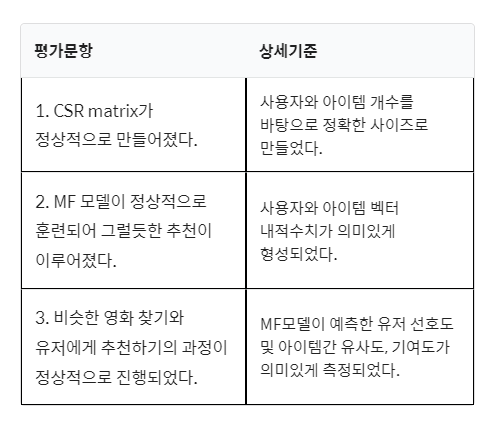

평가 및 고찰 :

모든 문항에 대해서 얼추 맞게? 나온거 같다.
가령 정확히 수치적으로 0.7 이상이면 추천도가 좋다. 이렇게 평가할만한 지표를 만들면 좋겠으나, 퍼센트로 환산해서 본다면 괜찮게 나온듯 하다. 

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

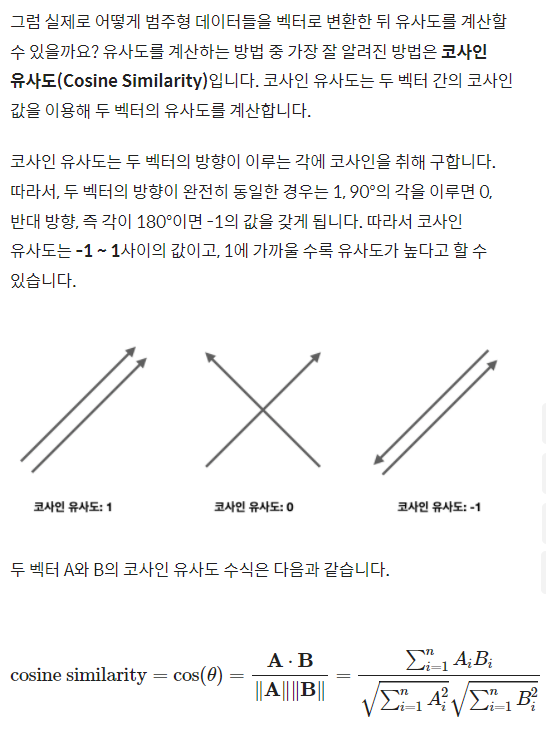

이전 fund29에서 나온 내용인데, 고교 수학2 과정에서 배웠던 내용이 현 생활에서 이렇게 사용될지는 몰랐다. 사실 넷플릭스나 스포티파이를 써본 입장에서 항상 추천시스템이 궁금하였는데, 선형대수적인 원리로 동작하는게 신기하였다.





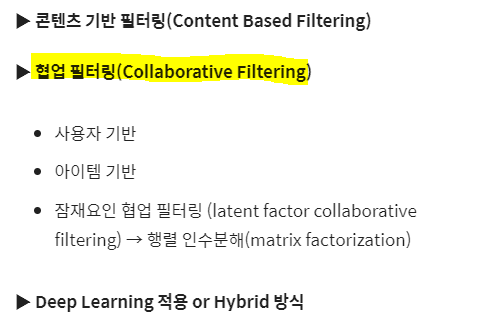

현재 프로젝트로 학습한 부분은 협업 필터링 부분인데, 사실 딥러닝을 적용하거나 하이브리드 방식으로 각각의 필터링의 장점만 탑재한 부분에 대한 학습을 못한것은 아쉽다.


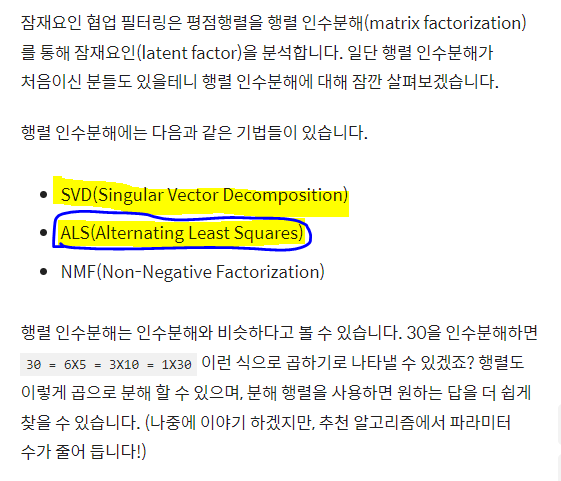

fund에서 봤던 특잇값 분해(SVD)와 더불어 (ALS)->한국어로 제대로 번역된 부분이 없음
을 학습하였는데, 한번 정리를 하여야 될거 같다.

colab에서의 오류로 인해 엄청나게 시간을 허비하였는데, 이 에러도 왜 발생했는지 조금더 서치가 필요할꺼 같다.